In [5]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # for work with missing values
from datetime import datetime, timedelta
import csv
import os
plt.style.use('seaborn-darkgrid') # setting dark grid on the background
palette = plt.get_cmap('Set2')  # Set2 is an identifier of a colormap object (a palette parameter)

%matplotlib inline

In [6]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

Let's take a look at the first five entries in the table:

In [7]:
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


Analyze some information about missing values:

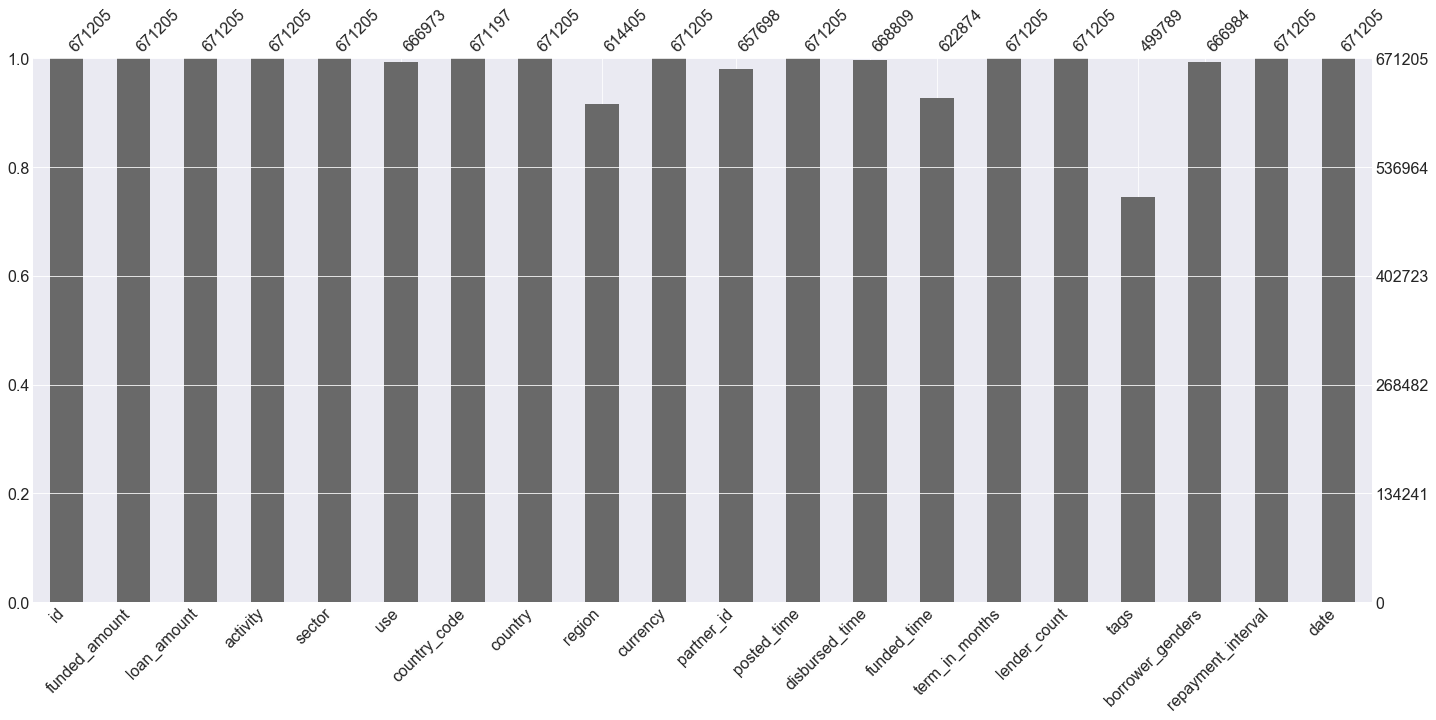

In [7]:
msno.bar(df_kiva_loans) # reflects numbers of values columns of the frame

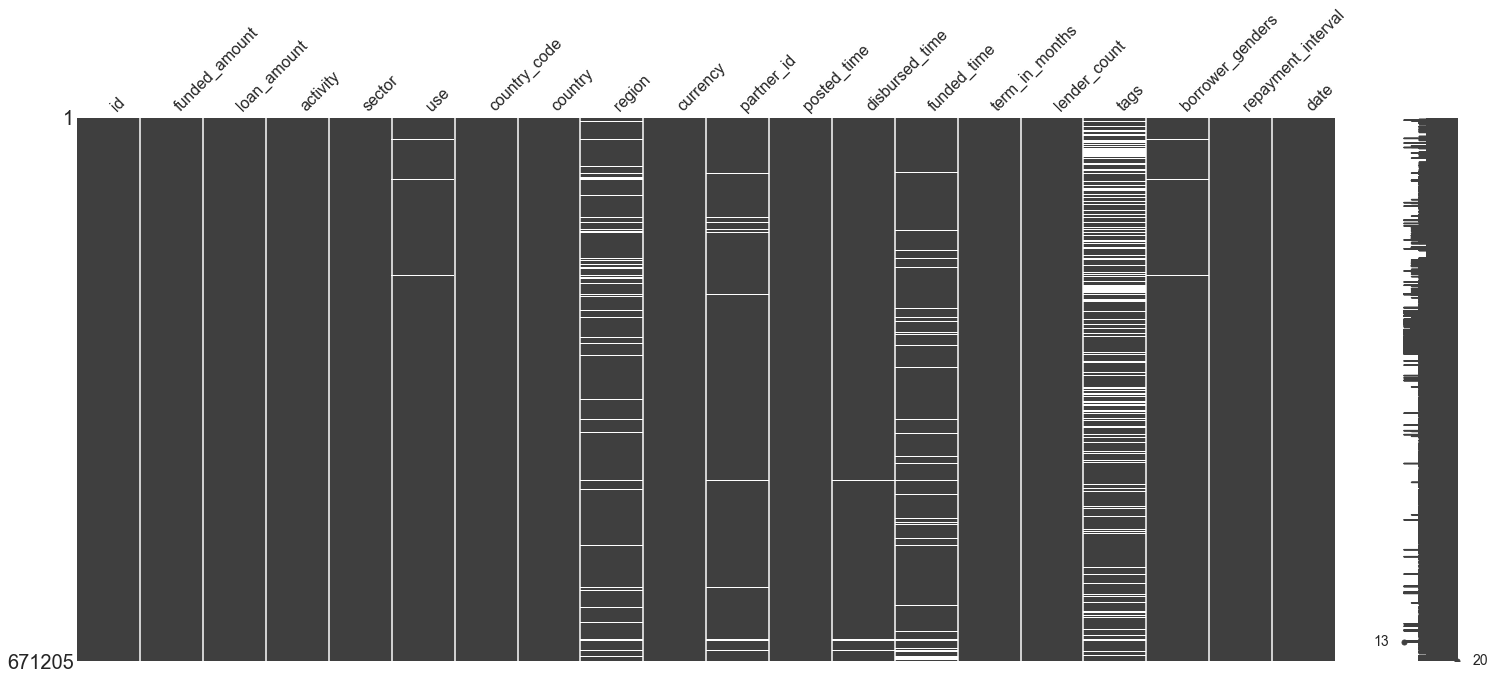

In [8]:
msno.matrix(df_kiva_loans)

The *tags* column has many omissions. The same holds true for *funded_time*. It can mean either that the sum has not been gathered yet or that it is not reflected in the upload correctly.

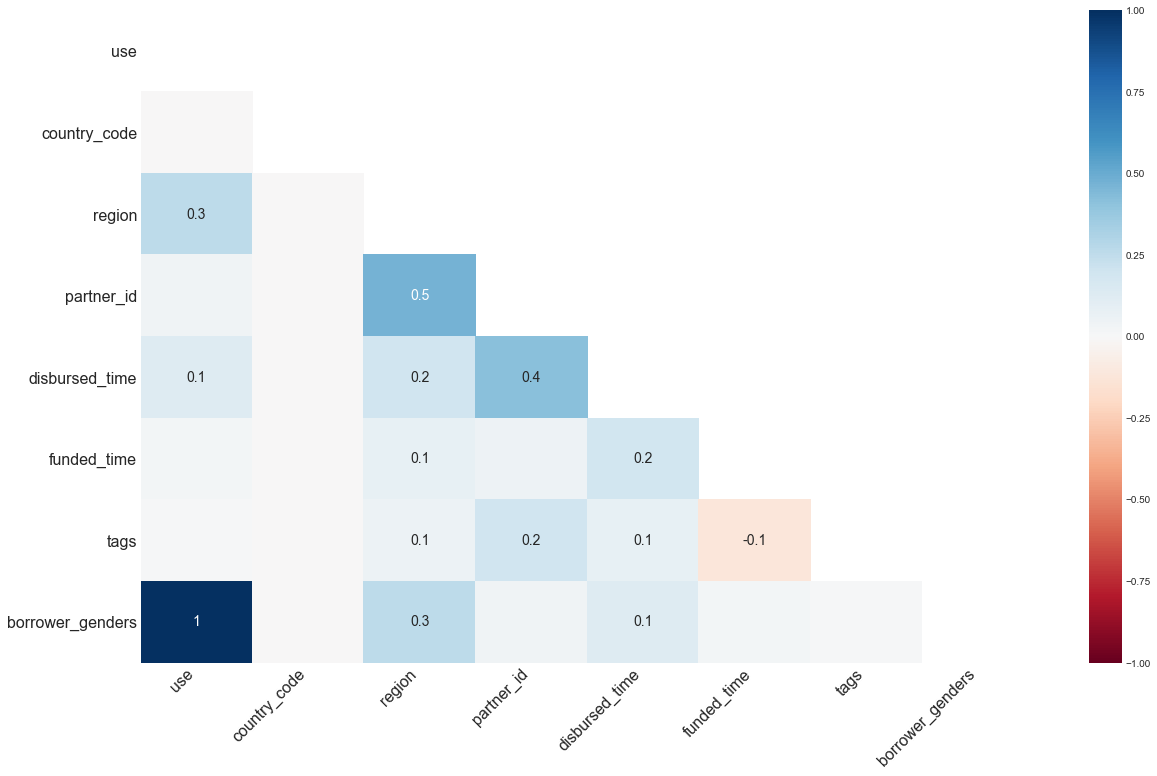

In [9]:
msno.heatmap(df_kiva_loans)  # correlation matrix

One of the most important aspects of EDA is data profiling - it helps analysts estimate how are values are distributed.

In [10]:
df_kiva_loans.dtypes  # types of columns

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

Find out some characteristics for numeric and string types of data

In [11]:
df_kiva_loans.describe(include = [np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [12]:
df_kiva_loans.describe(include = [np.object])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


So, the first apparent conclusions are:
1. There is information about 87 countries almost in all continents.
2. The country with the highest number of loans is **the Philippines**.

So, the first apparent conclusions are:
* There is information about 87 countries almost in all continents.
2. The country with the highest number of loans is **the Philippines**.
3. The nost popular category is **Agriculture**.
4. There's a fairly wide variation in the line of numeric values.<br>
5. Seemingly, we have **11298** unique values in the column of genders - obviously that's impossible and we have to correct it. 
6. Average financing is almost 786 dollars, the median is 450 dollars. Perhaps this means that there is a little share of deliveries. It's worth trying to understand who and for what needs needed so much money; also how quickly the money got to the applicant.
7. What's more interesting, it is that we have 1298 different dates. Having committed some calculations we can find that there are about 500 new deals per day. It tells us that Kiva has a strong influence.

### Let's do a country study.

In [13]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize = True)>0.005]
list_countries = list(countries.index)
countries

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: country, dtype: int64

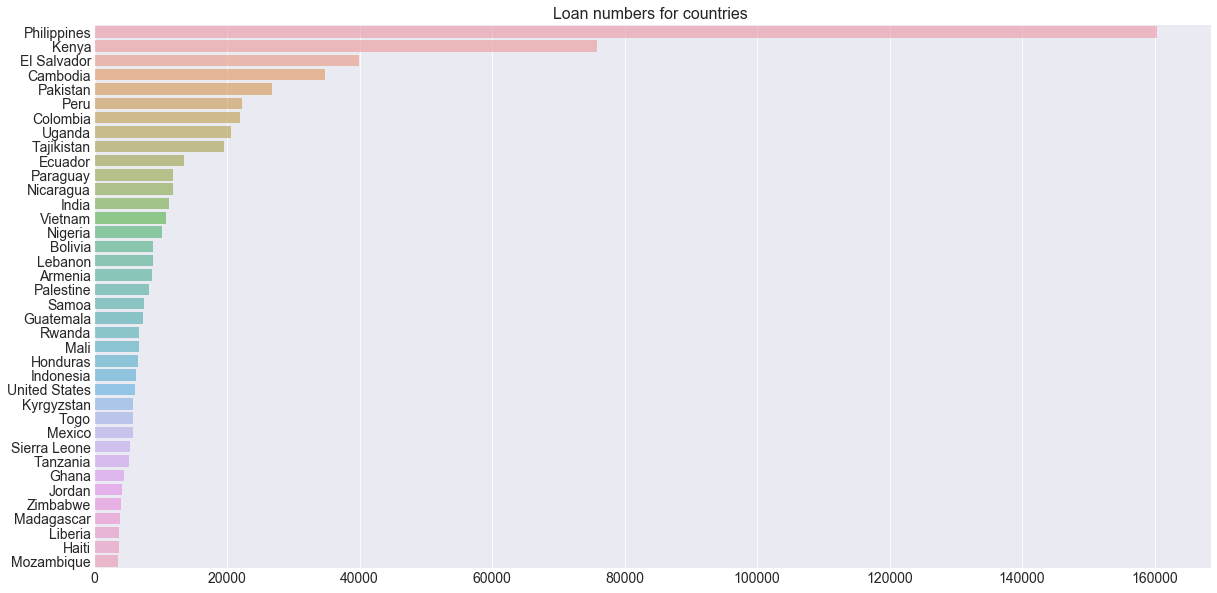

In [14]:
plt.figure(figsize = (20, 10))
plt.title("Loan numbers for countries ", fontsize=16)
plt.tick_params(labelsize=14) # size of ticks (x and y at the same time)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)

#### Why is the Philippines the country with the highest loan numbers?

Just over a quarter of all loans are made there.<br>
Perhaps it is so because little and short loans are quite widespread there.<br><br>
Such a strategy can can turn out to be more efficient for wide financing in comditions of poverty and disability.
<br><br>
We can see a great multitude of African countries. But there is no country from the EU. It's surprising that there's the USA - as we know, the state is not that poor as those mentioned before.<br><br>
Let's group all countries by continents. We are ought to consider another dataframe of ours.

In [15]:
df_mpi

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
...,...,...,...,...,...,...,...,...,...
2767,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2768,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2769,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2770,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN


In [16]:
df_mpi_grouped = df_mpi\
.groupby(['ISO', 'country', 'world_region'])['MPI']\
.mean()\
.fillna(0)\
.reset_index()

df_mpi_grouped

,ISO,country,world_region,MPI
0,AFG,Afghanistan,South Asia,0.309853
1,ALB,Albania,Europe and Central Asia,0.000000
2,ARM,Armenia,Europe and Central Asia,0.000000
3,AZE,Azerbaijan,Europe and Central Asia,0.000000
4,BDI,Burundi,Sub-Saharan Africa,0.411800
...,...,...,...,...
97,VUT,Vanuatu,East Asia and the Pacific,0.000000
98,YEM,Yemen,Arab States,0.225952
99,ZAF,South Africa,Sub-Saharan Africa,0.000000
100,ZMB,Zambia,Sub-Saharan Africa,0.312200


In [17]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')
df_kiva_loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,NaN,13.0,0,NaN,female,monthly,2017-07-25,NaN,NaN,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25,KEN,Sub-Saharan Africa,0.209375
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,NaN,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,female,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375


In [18]:
regions = df_kiva_loans['world_region'].value_counts()
regions

East Asia and the Pacific      206949
Sub-Saharan Africa             162903
Latin America and Caribbean    133759
Europe and Central Asia         38827
South Asia                      38815
Arab States                      9187
Name: world_region, dtype: int64

In [19]:
regions_list = regions.index.to_list()

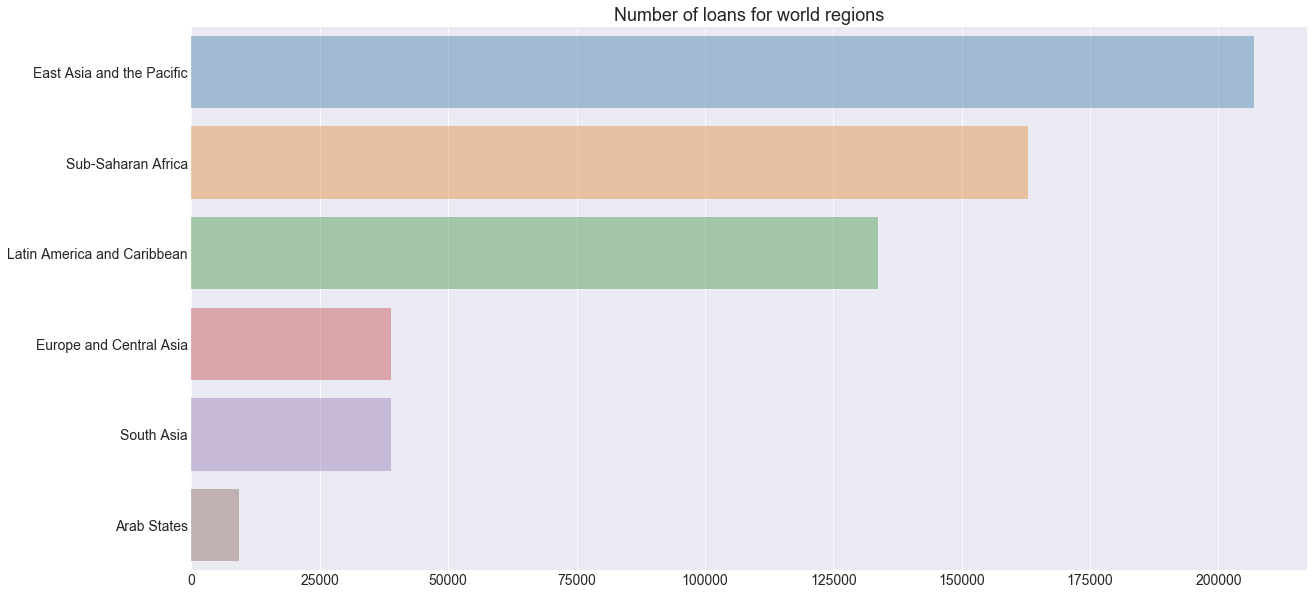

In [20]:
plt.figure(figsize=(20, 10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.4)
plt.title('Number of loans for world regions', fontsize=18)
plt.tick_params(labelsize=14)

Apparently, there are 3 leaders and 3 outsiders in loans.<br>
Based on this, we can assume that either there's no dire need of money (relatively rich regions), or studied system is not so popular there yet as in first 3 regions.
The presence  of **Arab States** is evidence in favor of the first assumption.

### What is about loaners' genders?

In [21]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                                                                                  426502
male                                                                                                                                                                                                                                                                                                    134710
female, female                                                                                                                                                                                                                                                                                           12164
female, female, female                                                                     

In many deals the loaner isn't one person - that's a group of people. In our dataset they're listed as "female, male, female, female". It explains existing of more than 12000 genders, so that's normal. Each combination is counted apart.

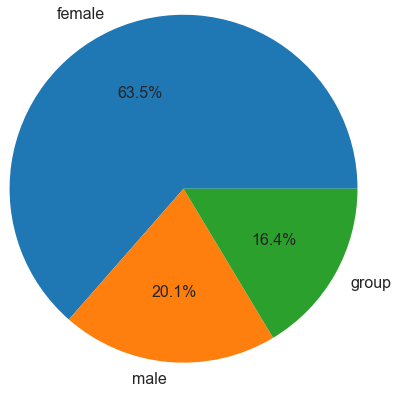

In [22]:
# identifying a specific type loans - group
df_kiva_loans['borrower_genders'] =\
[elem if elem in ['female', 'male'] else 'group' for elem in df_kiva_loans['borrower_genders']]
borrowers = df_kiva_loans['borrower_genders'].value_counts()
plot = borrowers.plot.pie(fontsize=16, autopct='%1.1f%%', labeldistance=1.1, radius=2)

So, it turns out that the vast majority of borrowers are women and it's quite unexpected.
#### What does this mean?
For instance, that women are using Kiva to get financials and develop their projects in homelands (most of them are  Third World countries, where it's traditionally that it's pretty hard for females).


In [23]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)

#### In which countries most of loaners are women?

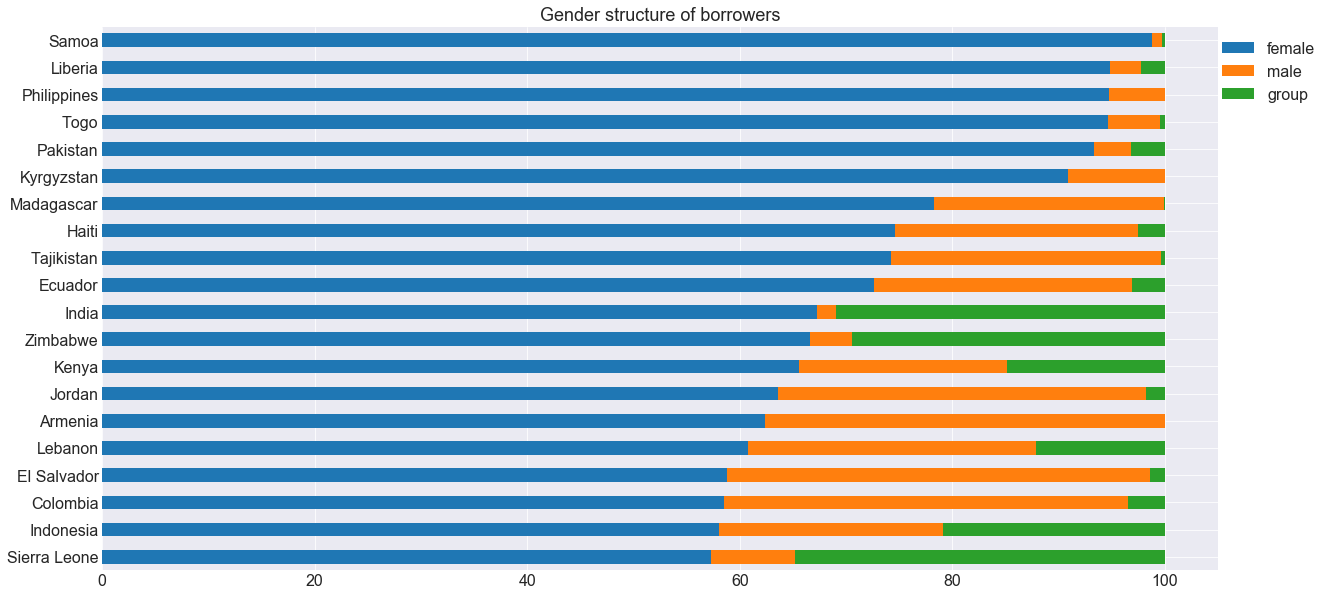

In [24]:
df_gender_by_country_f = df_gender_by_country.sort_values(by='female')
df_gender_by_country_f = df_gender_by_country_f[['female', 'male', 'group']]

plot = df_gender_by_country_f[-20:].plot.barh(
    figsize=(20, 10), 
    fontsize=16,
    stacked=True,
    title='Gender structure of borrowers')
plot.title.set_size(18)
plt.ylabel(None)
plt.legend(loc=1, bbox_to_anchor=(1.1, 1), fontsize=16)
plt.show()

#### In which countries most of loaners are men?

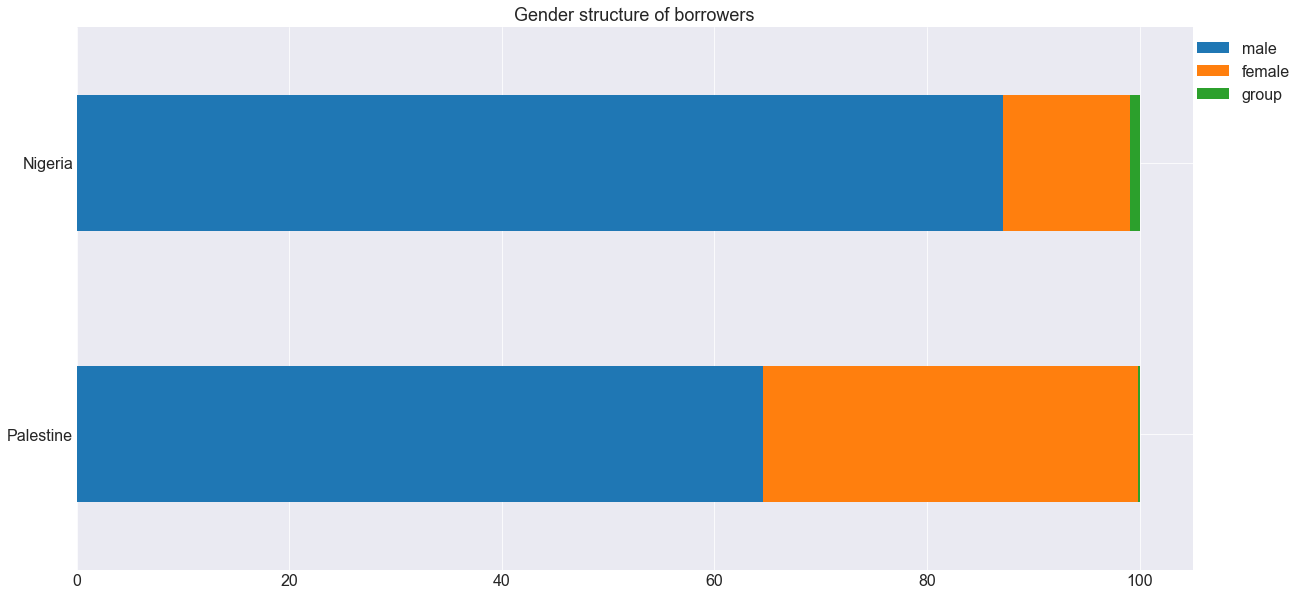

In [25]:
df_gender_by_country_m = df_gender_by_country.sort_values(by='male')
df_gender_by_country_m = df_gender_by_country_m[['male', 'female', 'group']]

plot = df_gender_by_country_m[-2:].plot.barh(
    figsize=(20, 10), 
    fontsize=16,
    stacked=True,
    title='Gender structure of borrowers')
plot.title.set_size(18)
plt.ylabel(None)
plt.legend(loc=1, bbox_to_anchor=(1.1, 1), fontsize=16)
plt.show()

#### In which countries most of loaners are groups?

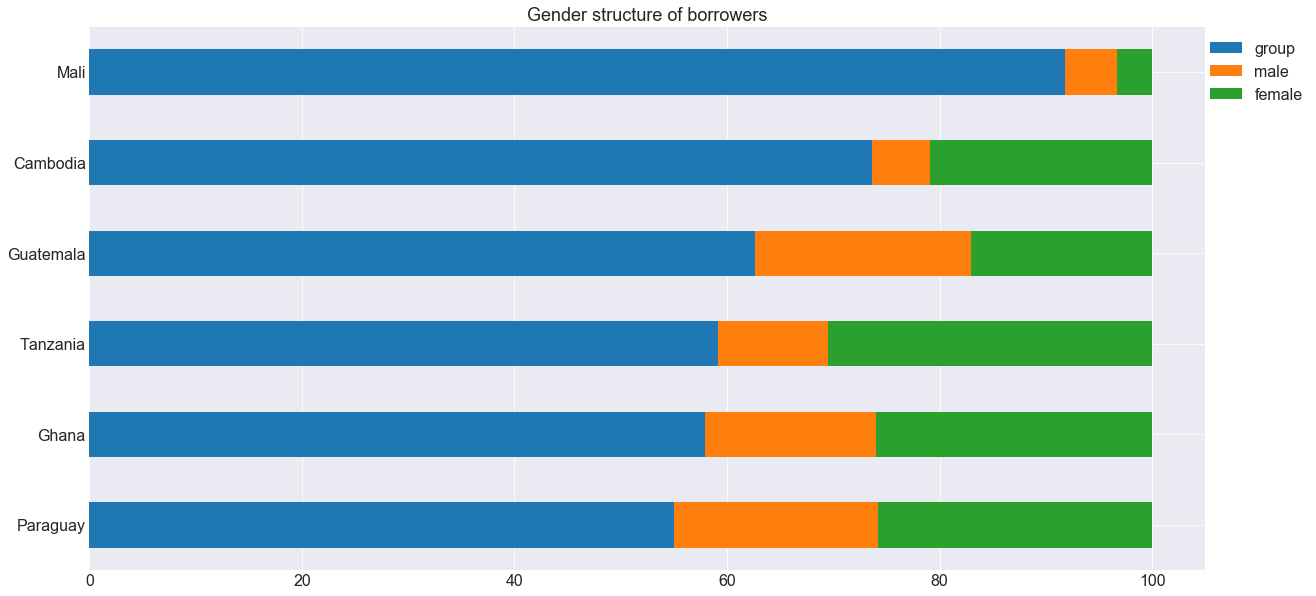

In [26]:
df_gender_by_country_g = df_gender_by_country.sort_values(by='group')
df_gender_by_country_g = df_gender_by_country_g[['group', 'male', 'female']]

plot = df_gender_by_country_g[-6:].plot.barh(
    figsize=(20, 10), 
    fontsize=16,
    stacked=True,
    title='Gender structure of borrowers')
plot.title.set_size(18)
plt.ylabel(None)
plt.legend(loc=1, bbox_to_anchor=(1.1, 1), fontsize=16)
plt.show()

### Amount of loans

Let's find out what kind of loans and why people take

#### By sectors


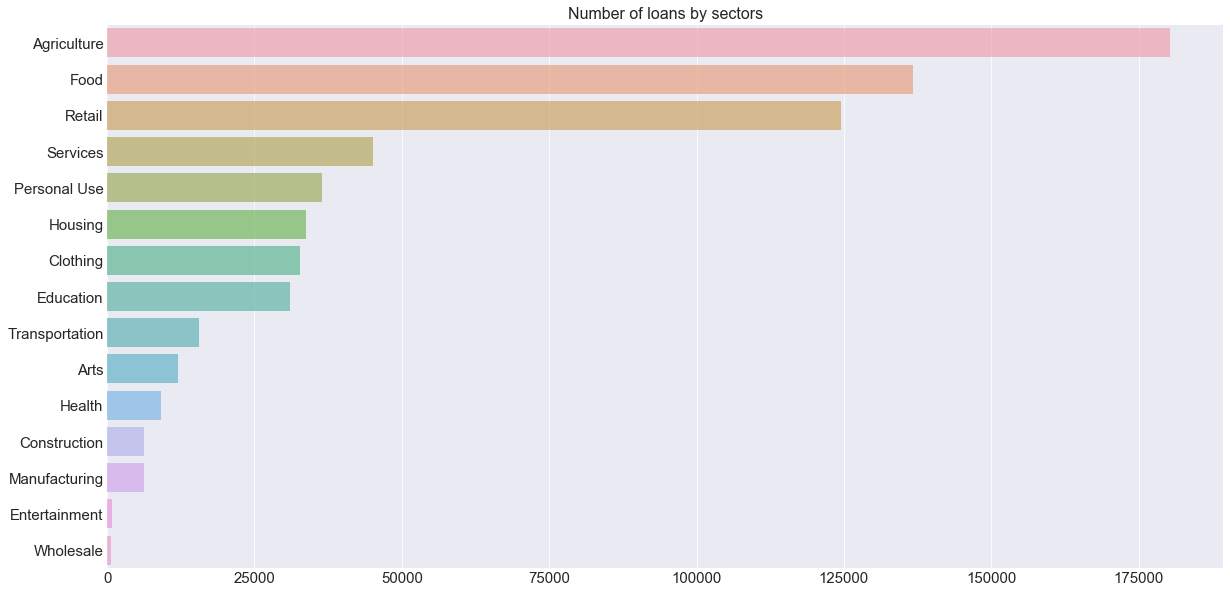

In [27]:
sectors=df_kiva_loans['sector'].value_counts()

plt.figure(figsize=(20,10))
plt.title("Number of loans by sectors", fontsize=16)
plt.tick_params(labelsize=15)
sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

We see that first categories are bound to product sales and the company's website only confirms this assumption. The first several posts there are about borrowing some money on purchase of seeds and like that. Seemingly we are working with countries where the level of poverty is too high. And as well, we can convince in that vare little loans are taken on the entertainment industry what tells us about such a strong need of money that citizens can't afford to unwind.

#### By types of activity

Let's consider our metrics in detail.

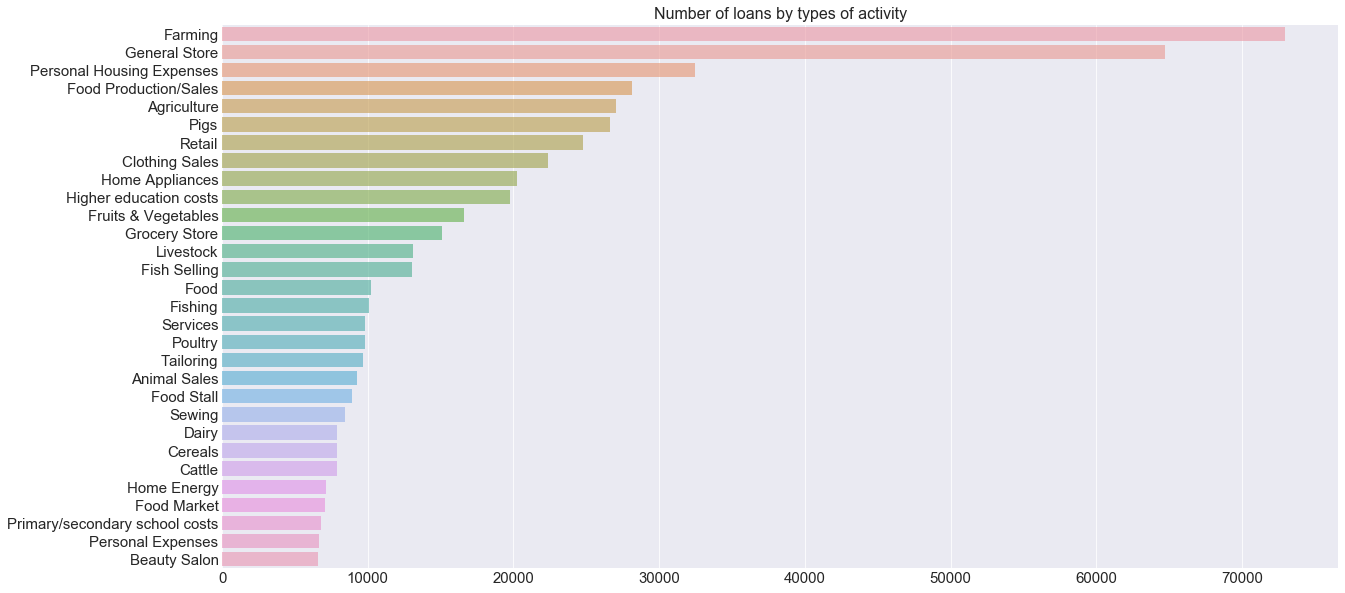

In [28]:
activities = df_kiva_loans['activity'].value_counts().head(30)

plt.figure(figsize=(20,10))
plt.title("Number of loans by types of activity", fontsize=16)
plt.tick_params(labelsize=15)
sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show()

The chart proves the correctness of our observations.

In [29]:
purposes = df_kiva_loans['use'].value_counts().head(15)
purposes

to buy a water filter to provide safe drinking water for their family.    5217
to buy a water filter to provide safe drinking water for her family.      4082
To buy a water filter to provide safe drinking water for their family.    2141
to build a sanitary toilet for her family.                                1708
to build a sanitary toilet for her family                                 1599
to buy ingredients for her food production business                       1419
to purchase more groceries to sell.                                       1409
to buy feed and other supplies to raise her pigs.                         1405
to buy fertilizers and other farm supplies.                               1280
to buy a water filter to provide safe drinking water for his family.      1261
to buy feed and vitamins for her pigs.                                    1154
to buy feeds and other supplies to raise her pigs                         1027
to buy fertilizers and other farm supplies          

The lists says that the leading purposes are that meet basic needs.

### Most popular types of activity

In [30]:
loans_by_activity_sector =\
df_kiva_loans[df_kiva_loans['sector'].isin(sectors[:9].index.values)]\
.groupby(['sector', 'activity'])['loan_amount']\
.count()\
.reset_index()
loans_by_activity_sector

,sector,activity,loan_amount
0,Agriculture,Agriculture,27023
1,Agriculture,Animal Sales,9237
2,Agriculture,Aquaculture,108
3,Agriculture,Beekeeping,50
4,Agriculture,Cattle,7865
...,...,...,...
124,Services,Water Distribution,564
125,Transportation,Motorcycle Transport,5888
126,Transportation,Rickshaw,2878
127,Transportation,Taxi,2631


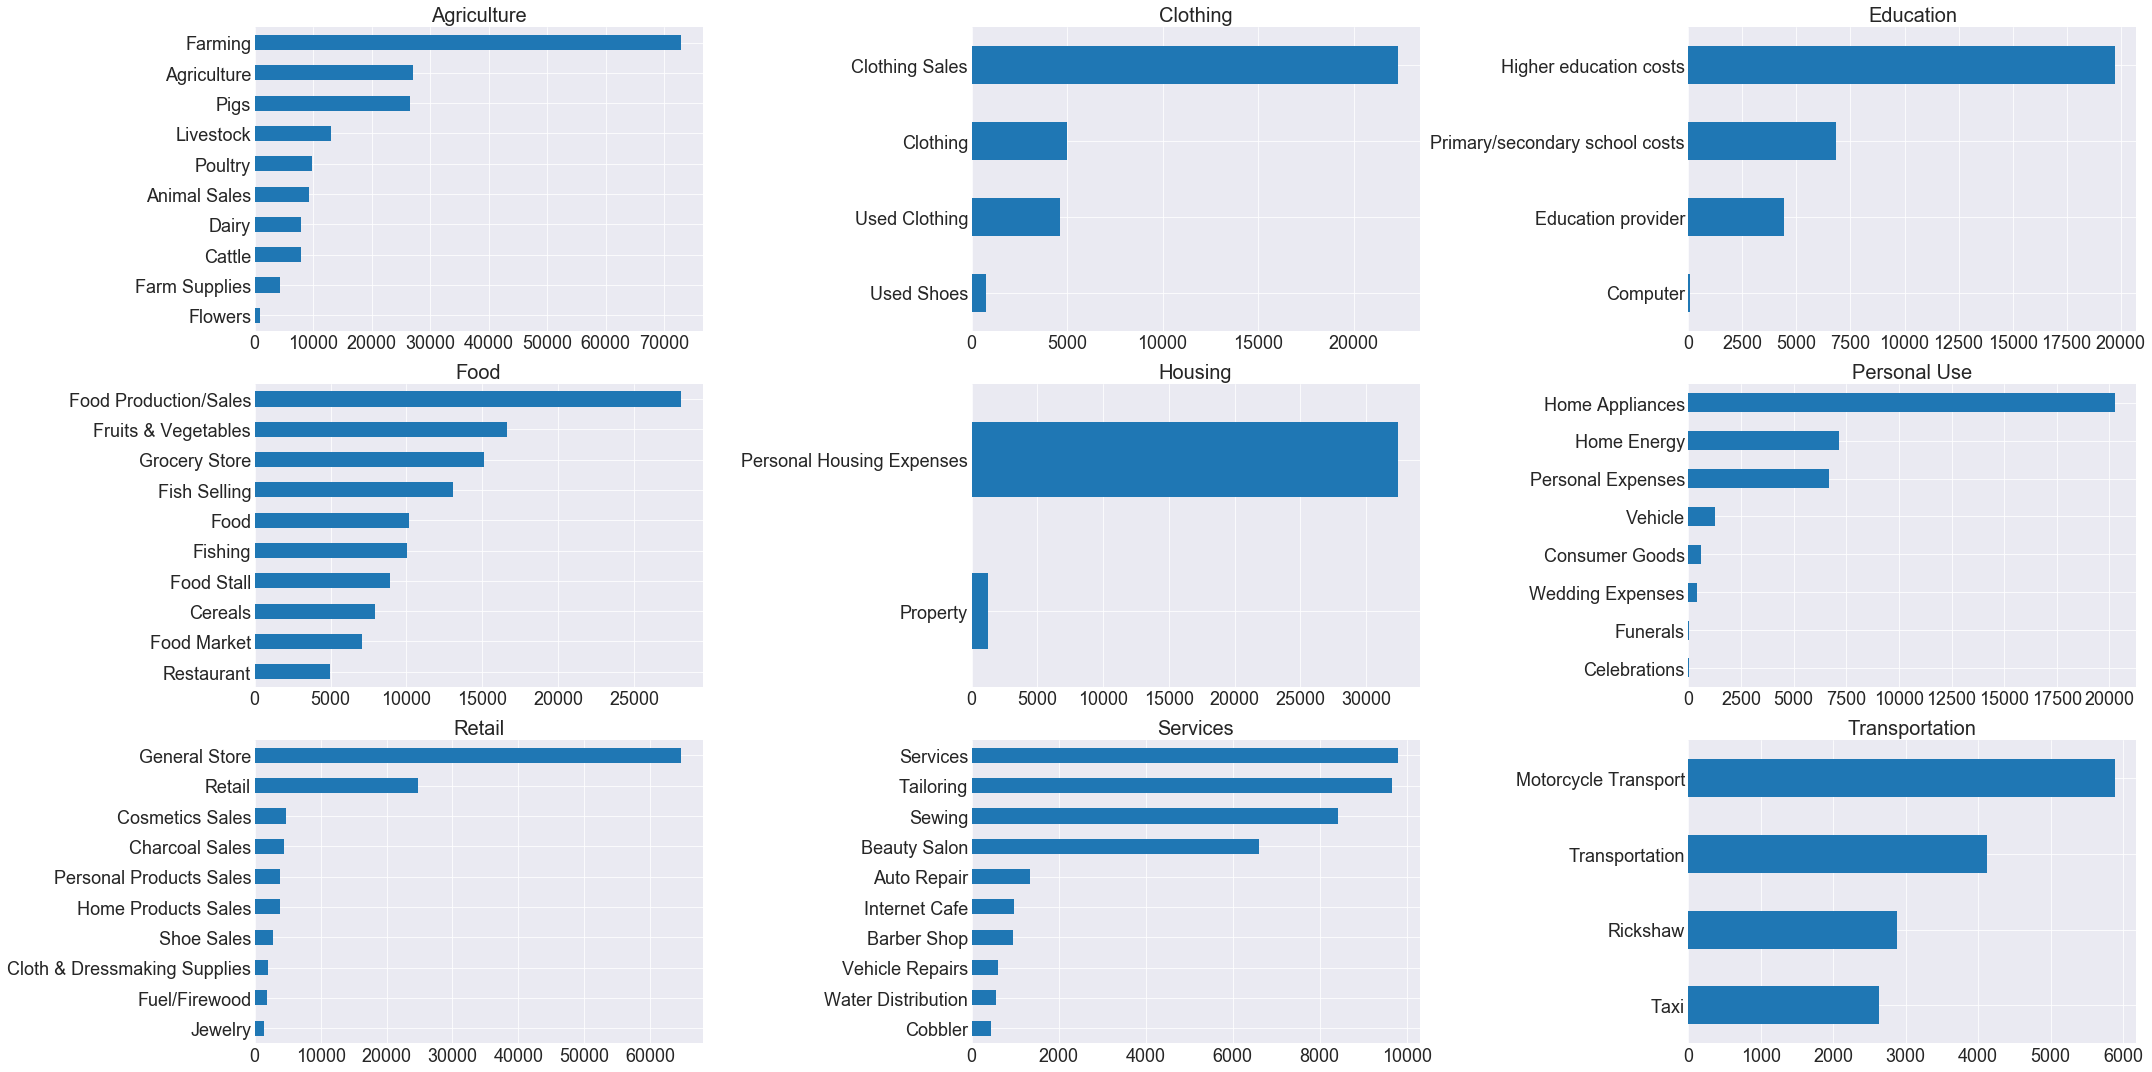

In [31]:
fig, axes = plt.subplots(3,3, sharex=False, squeeze=False, figsize=(30, 15))

for ax, q in zip(axes.ravel(), loans_by_activity_sector.sector.unique()):
    tmp_df = loans_by_activity_sector[loans_by_activity_sector.sector.eq(q)]\
                .dropna()\
                .sort_values(by='loan_amount')[-10:]
    ax.set_title(q, fontsize=20)
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)

We can see in the diagram that the largest loans are taken by people to be able to cope with quite simple things. At the same time it's pleasant to see in spite of everything find means for education - it's important that people aim to improve their lives.

### Financing volume

#### The distribution of the loan amount

Not less important information can be given by absolute values of loans, which people ask for to reach their goals in different countries.<br>
Let's look a the chart of the distribution of the loan amount.

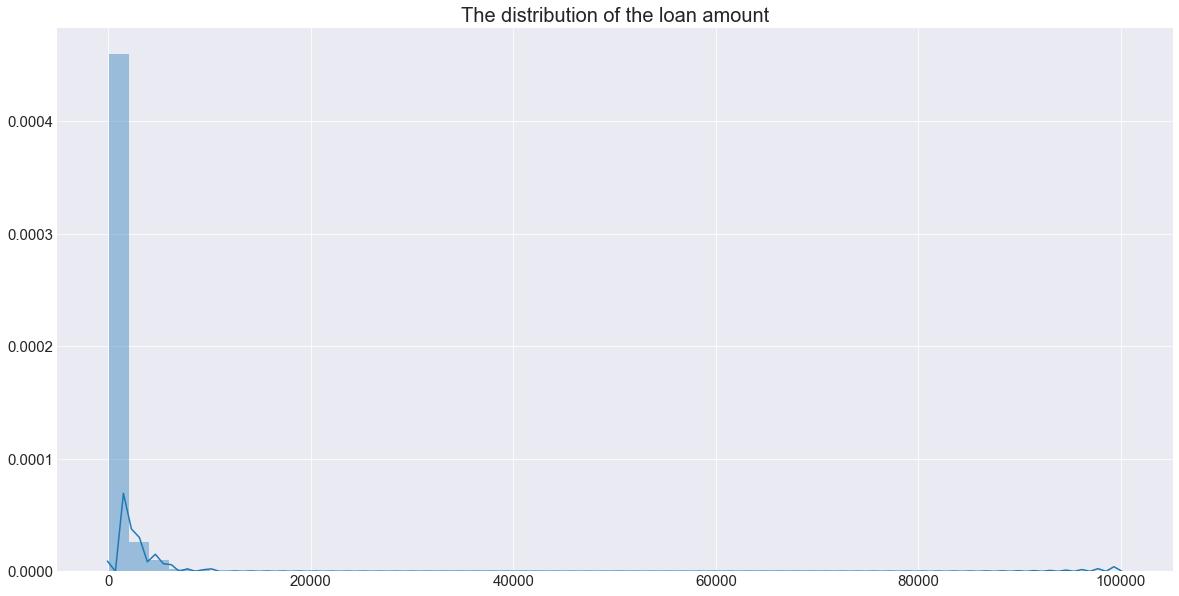

In [32]:
plt.figure(figsize=(20,10))
plt.title("The distribution of the loan amount", fontsize=20)
plt.tick_params(labelsize=15)
sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()

We can get convinced in presence of outliers. They pretty much distorts the whole picture. But we can get rid of them by using three-sigma rule of thumb (68-95-99,7), according to which it will be enough just to take the interval [$\mu$-3$\sigma$, $\mu$+3$\sigma$]. Verily the distribution is not necessarily normal but in our case this is an appropriate solution.

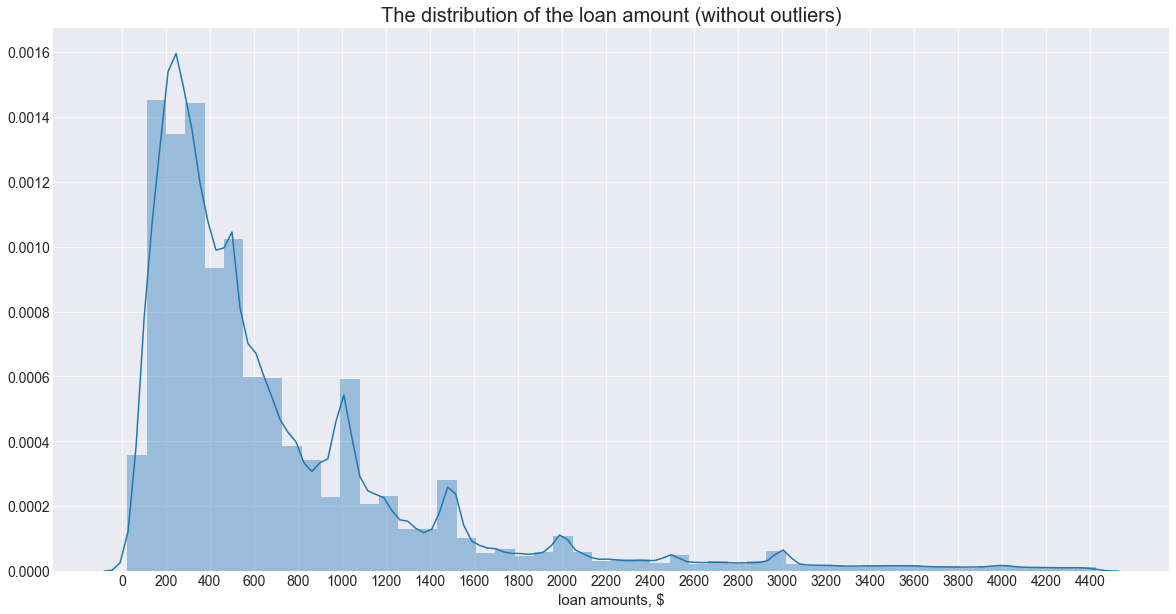

In [33]:
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()  # array of deviations
std = df_kiva_loans['loan_amount'].std()
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("The distribution of the loan amount (without outliers)", fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']+1), 200))

sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.xlabel('loan amounts, $', size=15)
plt.show()

Seemigly, most loans reach the mark between 200 dollars and 600 dollars. The amounts are naturally decreasing. In addition we have other peaks on the chart at marks of 1000, 1500 and 2000 dollars. It means that there may be some certain types of projects which require more money.

#### Loan amounts by sectors

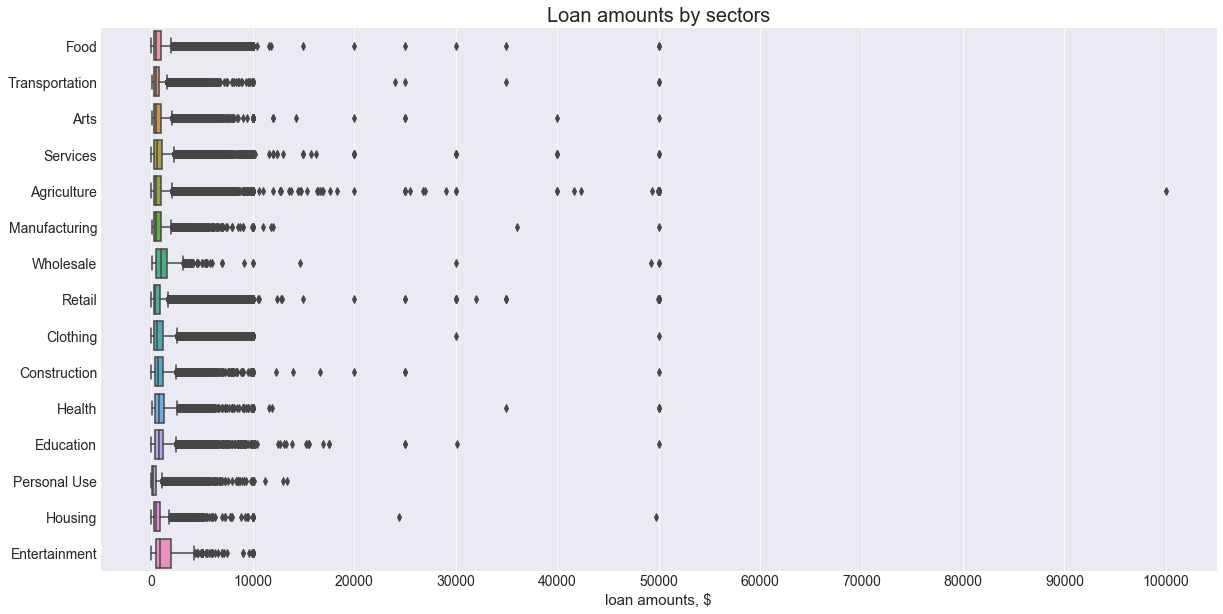

In [34]:
plt.figure(figsize=(20,10))
plt.title("Loan amounts by sectors", fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 10000))

sns.boxplot(x='loan_amount', y='sector', data=df_kiva_loans).set(xlabel=None, ylabel=None)
plt.xlabel('loan amounts, $', size=15)
plt.show()

In [35]:
huge_loans = df_kiva_loans\
.sort_values(by='loan_amount', ascending=False)[:500][['sector', 'country', 'use', 'borrower_genders']]\
.dropna()\
.reset_index(drop=True)

print(huge_loans.groupby('borrower_genders').apply(len))
print(huge_loans.groupby('country').apply(len))
huge_loans.use[:20]


borrower_genders
female    230
group      36
male      222
dtype: int64
country
Albania                                   1
Azerbaijan                                3
Benin                                     1
Brazil                                    2
Cambodia                                  1
Chile                                     1
Colombia                                  3
Cote D'Ivoire                             1
Dominican Republic                        1
Ecuador                                   1
Ghana                                     6
Guatemala                                 5
Haiti                                     8
India                                     1
Indonesia                                 5
Iraq                                      9
Kenya                                    36
Lao People's Democratic Republic          2
Lebanon                                   2
Madagascar                                1
Malawi                                  

0     create more than 300 jobs for women and farmer...
1     to support 800+ farmers by improving their pro...
2     to buy and plant resin producing pine trees. T...
3     to increase smallholder farmers’ incomes by bu...
4     To work with 17 farming cooperatives to proces...
5        To buy and sell Barefoot Power solar lighting.
6     To pay smallholder coffee farmers in rural Ken...
7     to enable 5,000 additional small-holder farmer...
8     to distribute 400 pay-as-you-go solar systems ...
9     to bolster logistics of affordable water distr...
10    to fund the harvest of seeds of 6,000 smallhol...
11    to distribute solar home systems throughout ru...
12    to distribute 200+ innovative & affordable pay...
13    to add value and jobs to the local economy by ...
14    to provide income opportunities in remote Indo...
15    to generate income to over 600 fishermen in Ta...
16    to purchase chicken feed & a delivery vehicle ...
17    to generate income opportunities for 1250+

As we can see, the maximum loan of the most sectors is 50000 dollars (except Personal Use and Entertainment because these fields are not that popular among people; and as well, Agriculture - this sector on the contrary has the largest loan - 100000 dollars);.

In [36]:
sector_mean_median = df_kiva_loans\
.groupby(['sector'])['loan_amount']\
.agg(median='median', mean='mean')\
.sort_values('median', ascending=False)

sort_order = sector_mean_median.index.to_list()

sector_mean_median

,median,mean
sector,,
Wholesale,950.0,1569.716088
Entertainment,887.5,1673.674699
Education,725.0,998.565924
Health,725.0,1067.266616
Construction,700.0,1068.147735
Clothing,600.0,1139.237829
Services,550.0,1064.631148
Agriculture,500.0,793.490228
Housing,500.0,701.549020


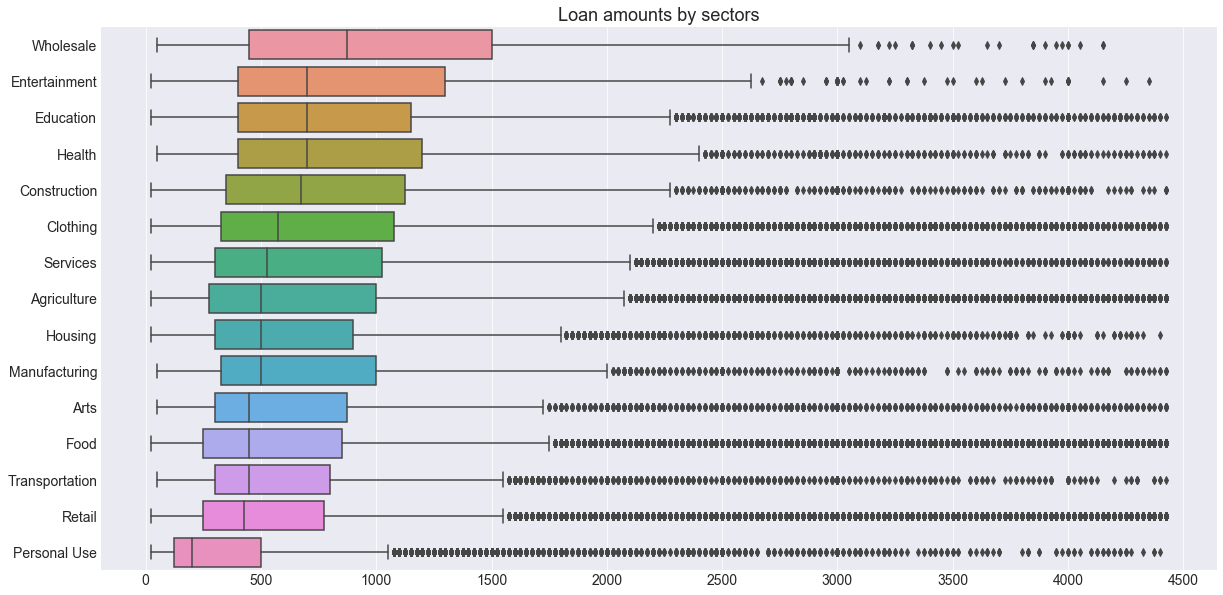

In [37]:
plt.figure(figsize=(20,10))
plt.title("Loan amounts by sectors", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", order=sort_order, data=df_kiva_loans_trimmed)\
.set(ylabel=None, xlabel=None)
plt.show()

Above we can see what medians for each sector are. Leaders of sectors all require huge 
amounts of money and, on the contrary, such sector as Personal Use is the area which is destined
to mean the most basic needs of a human being. This is typical for regions with extreme poverty.

#### Loan amounts by continents

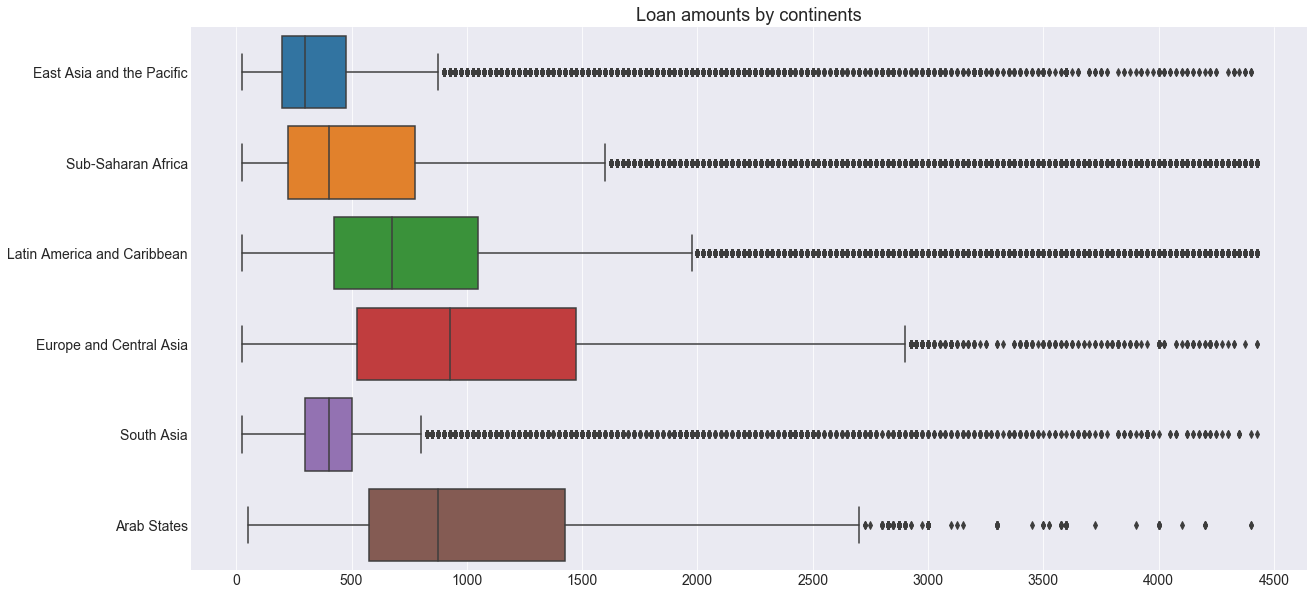

In [38]:
plt.figure(figsize=(20,10))
plt.title("Loan amounts by continents", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions_list, data=df_kiva_loans_trimmed)\
.set(ylabel=None, xlabel=None)
plt.show()

We see that the poorest region is **East Asia**, where people need many and at the same time small loans. But there is a region which median loan is small as well and where the quantity of loans isn't so huge - it's **South Asia**. Perhaps, there's a great opportunity for Kiva to declare itself over there - may be citizens simply aren't acquainted with the platform but they need it badly.

In [39]:
# drop na (missing) values
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

dates = ['posted_time','disbursed_time']

df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1) 

dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()

df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]

C:\Anaconda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

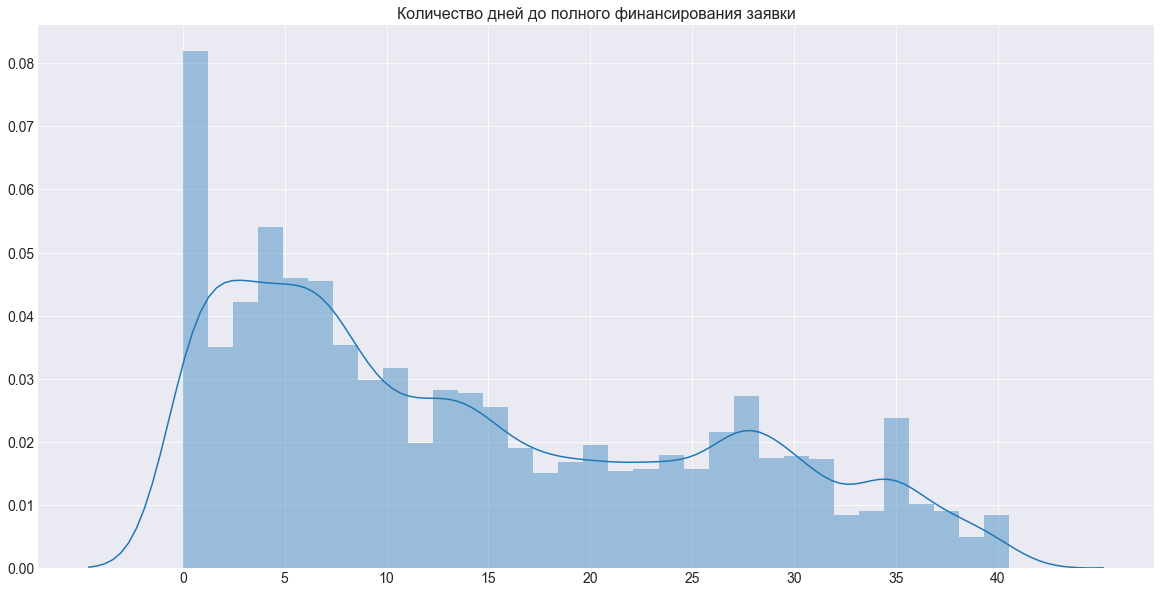

In [40]:
plt.figure(figsize=(20,10))
plt.title("Количество дней до полного финансирования заявки", fontsize=16)
plt.xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
plt.tick_params(labelsize=14)

sns.distplot(df_loans_dates_trimmed['time_funding']).set(ylabel=None, xlabel=None)
plt.show()

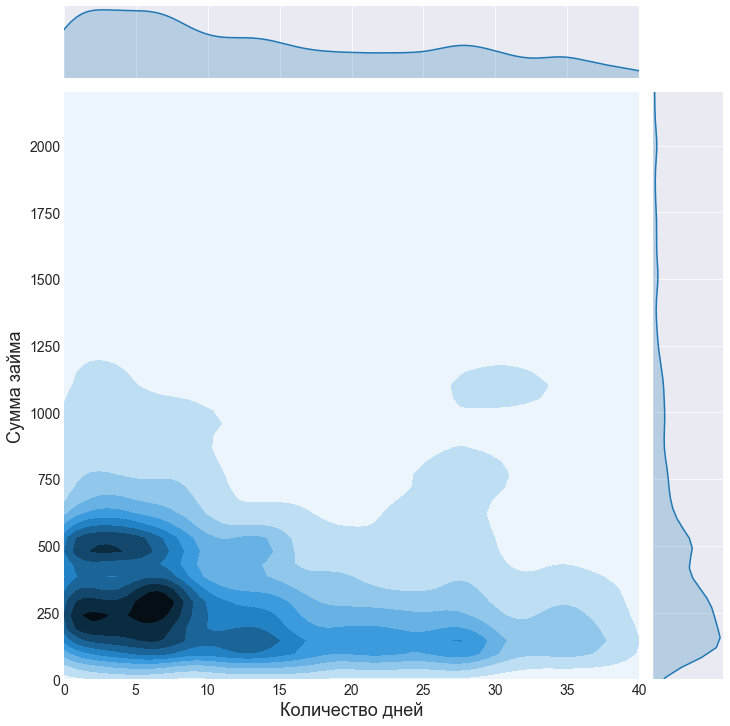

In [41]:
p = sns.jointplot(x="time_funding", y="loan_amount", data=df_loans_dates_trimmed, kind='kde',\
        height=10, ratio=7, xlim=[0,40] , ylim=[0,2200])\
        .set_axis_labels("Количество дней", "Сумма займа", size=18)

p.ax_joint.tick_params(labelsize=14)

plt.show()

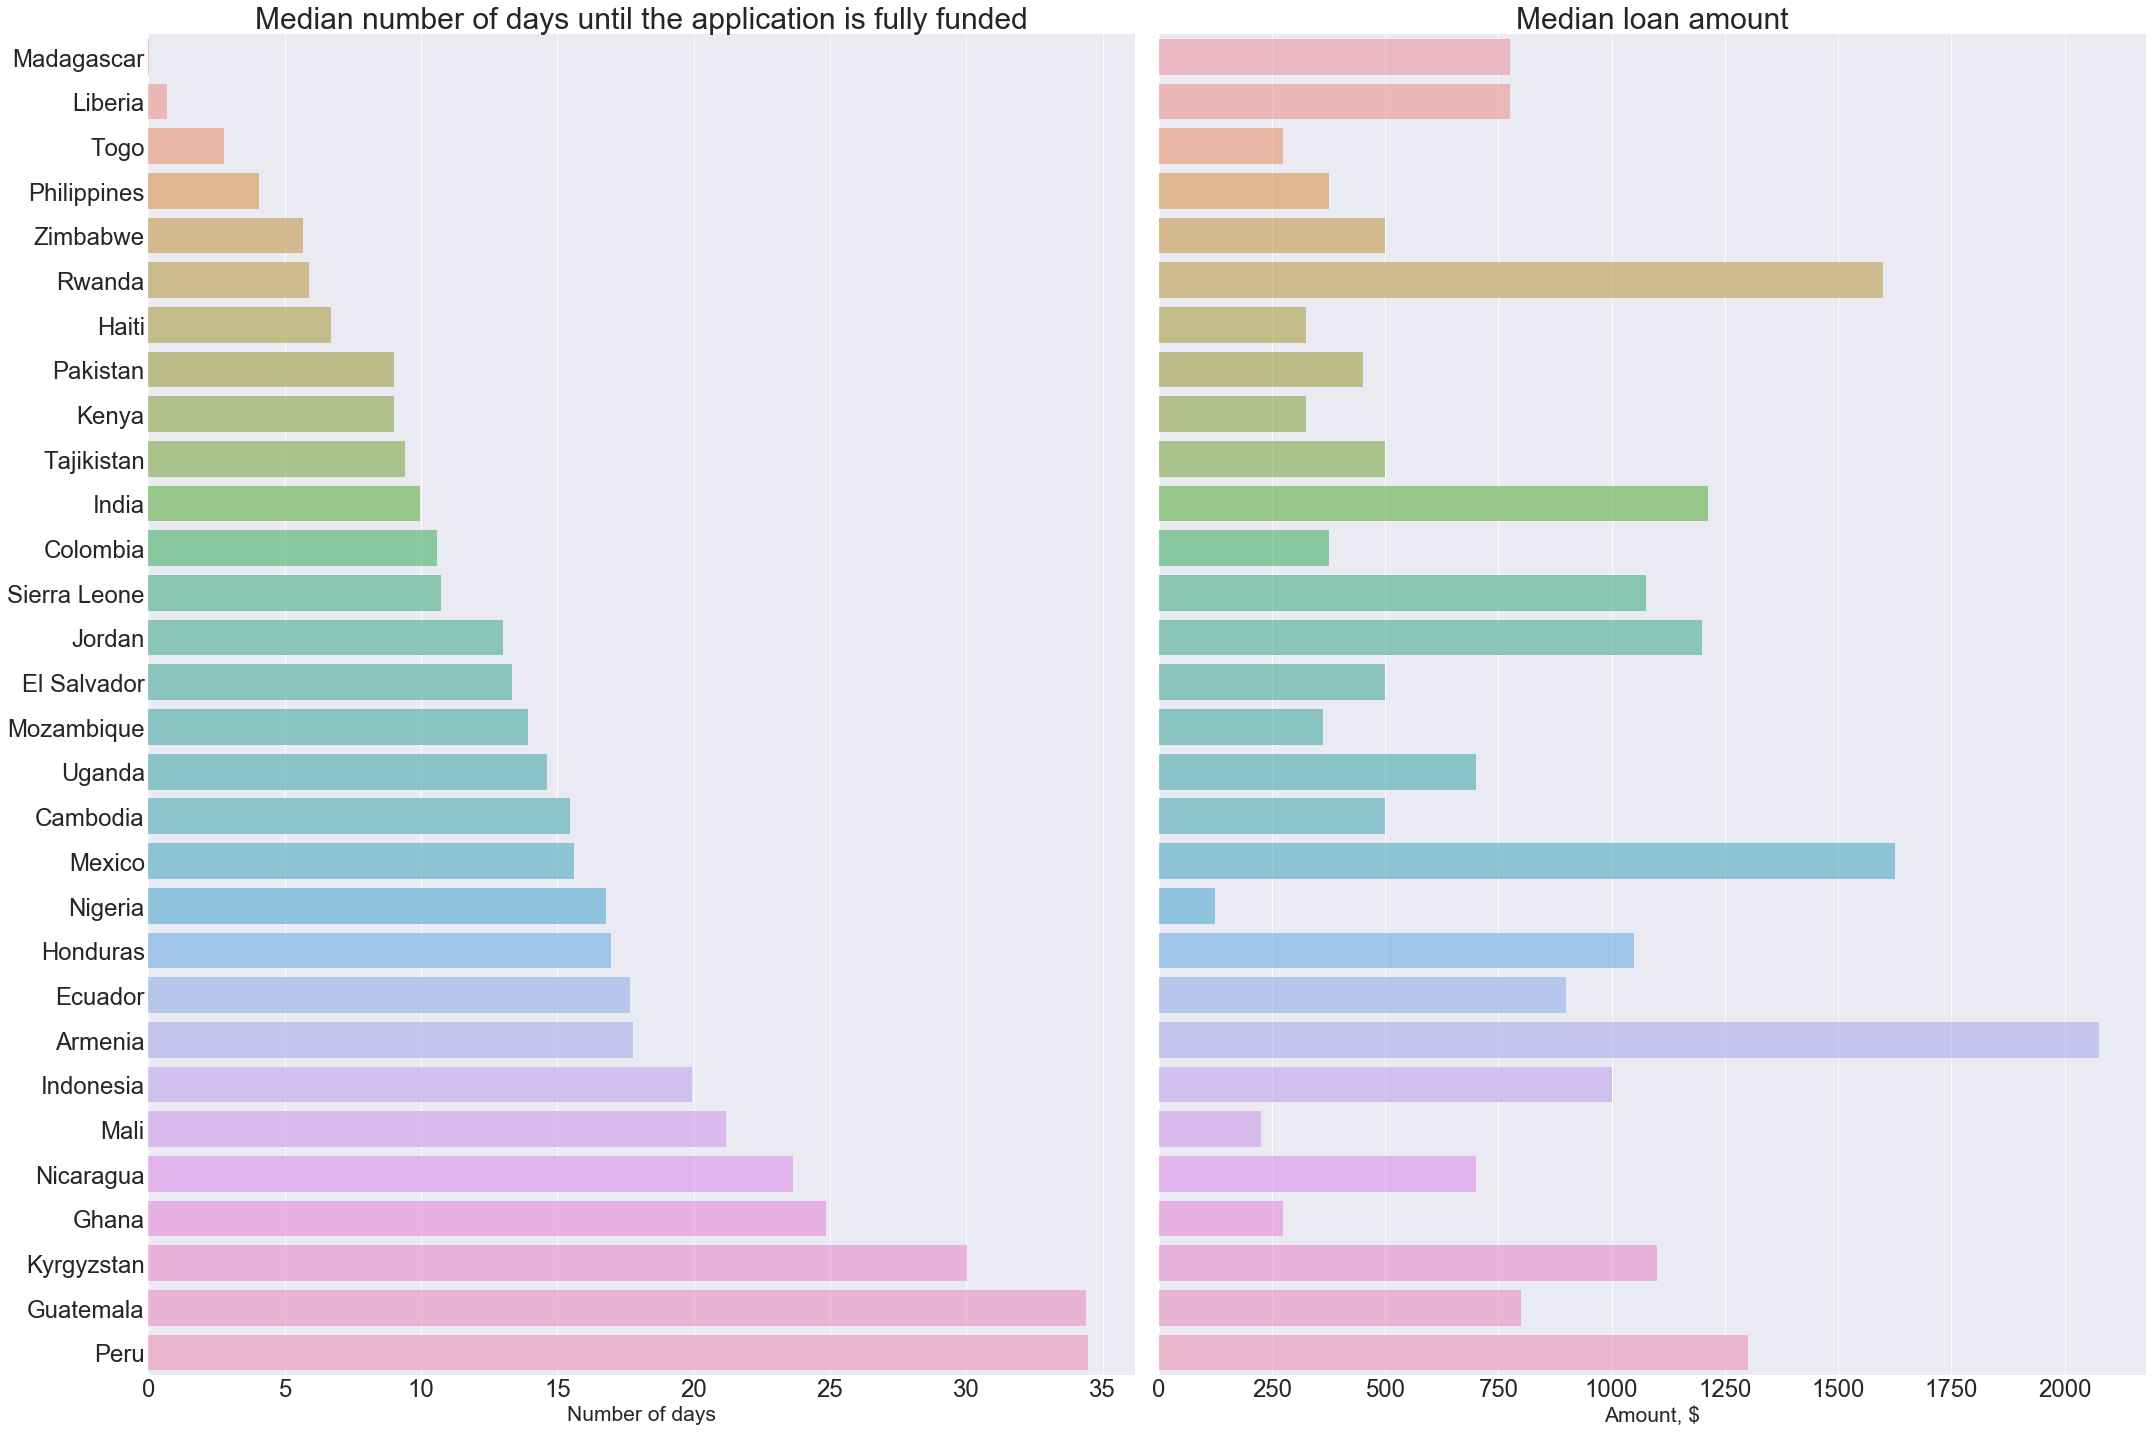

In [42]:
df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_country_median = df_country_median[df_country_median.country.isin(list_countries)]\
.sort_values(by='time_funding')

f,ax=plt.subplots(1, 2, sharey=True, figsize=(30,20))

sns.barplot(y='country', x='time_funding', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Median number of days until the application is fully funded", fontsize=30)
ax[0].set_xlabel('Number of days', fontsize=21)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=24)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Median loan amount", fontsize=30)
ax[1].set_xlabel('Amount, $', fontsize=21)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=24)
plt.tight_layout()
plt.show()

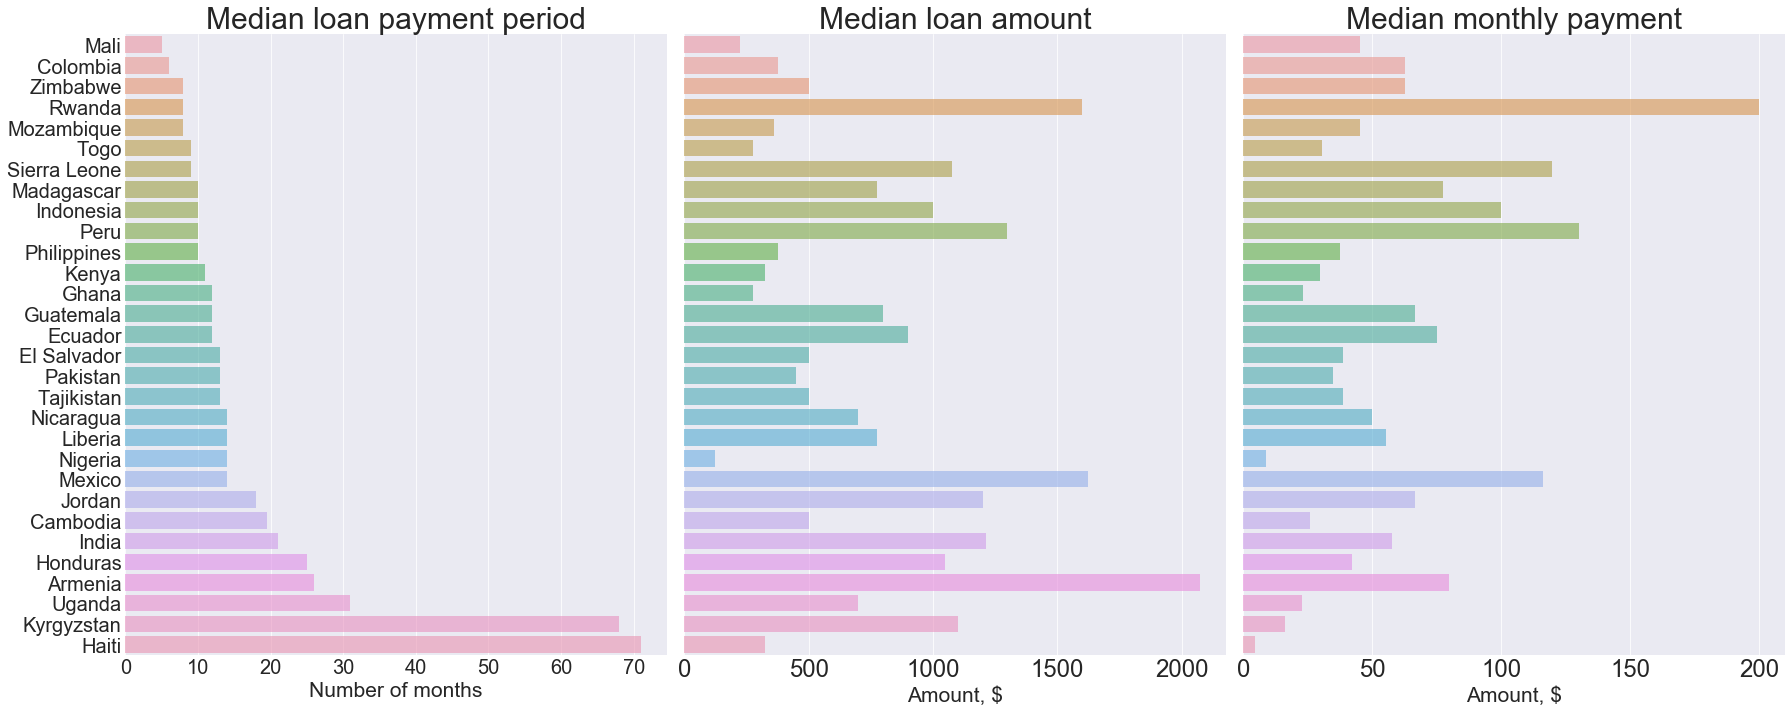

In [43]:
df_country_median = df_country_median.sort_values(by='term_in_months')
df_country_median['monthly_repayment'] = \
df_country_median['loan_amount'] / df_country_median['term_in_months']

f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Median loan payment period", fontsize=30)
ax[0].set_xlabel('Number of months', fontsize=21)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=20)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Median loan amount", fontsize=30)
ax[1].set_xlabel('Amount, $', fontsize=21)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=24)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Median monthly payment", fontsize=30)
ax[2].set_xlabel('Amount, $', fontsize=21)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=24)
plt.tight_layout()
plt.show()

# Домашнее задание

### №1

In [44]:
df_dependence = df_kiva_loans[['world_region', 'sector', 'borrower_genders']]\
.dropna(subset=['sector', 'world_region', 'borrower_genders'])

df_dependence_on_regions = df_dependence\
.sort_values('world_region')\
.groupby('world_region')['borrower_genders']\
.apply(list)\
.to_frame()

df_dependence_on_regions['males and regs, %'] = 0
df_dependence_on_regions['females and regs, %'] = 0
df_dependence_on_regions['groups and regs, %'] = 0
for _ in range(len(df_dependence_on_regions)):
    pattern = list(df_dependence_on_regions.iloc[:,0])[_]
    males = pattern.count('male')
    females = pattern.count('female')
    groups = pattern.count('group')
    df_dependence_on_regions.iloc[_,1] = round(males / (males + females + groups) * 100, 2)
    df_dependence_on_regions.iloc[_,2] = round(females / (males + females + groups) * 100, 2)
    df_dependence_on_regions.iloc[_,3] = round(groups / (males + females + groups) * 100, 2)
del df_dependence_on_regions['borrower_genders']
    
df_dependence_on_regions

,"males and regs, %","females and regs, %","groups and regs, %"
world_region,,,
Arab States,42.44,42.30,15.26
East Asia and the Pacific,6.12,80.15,13.73
Europe and Central Asia,28.91,70.75,0.35
Latin America and Caribbean,33.52,53.63,12.84
South Asia,2.90,85.90,11.20
Sub-Saharan Africa,25.77,52.35,21.89


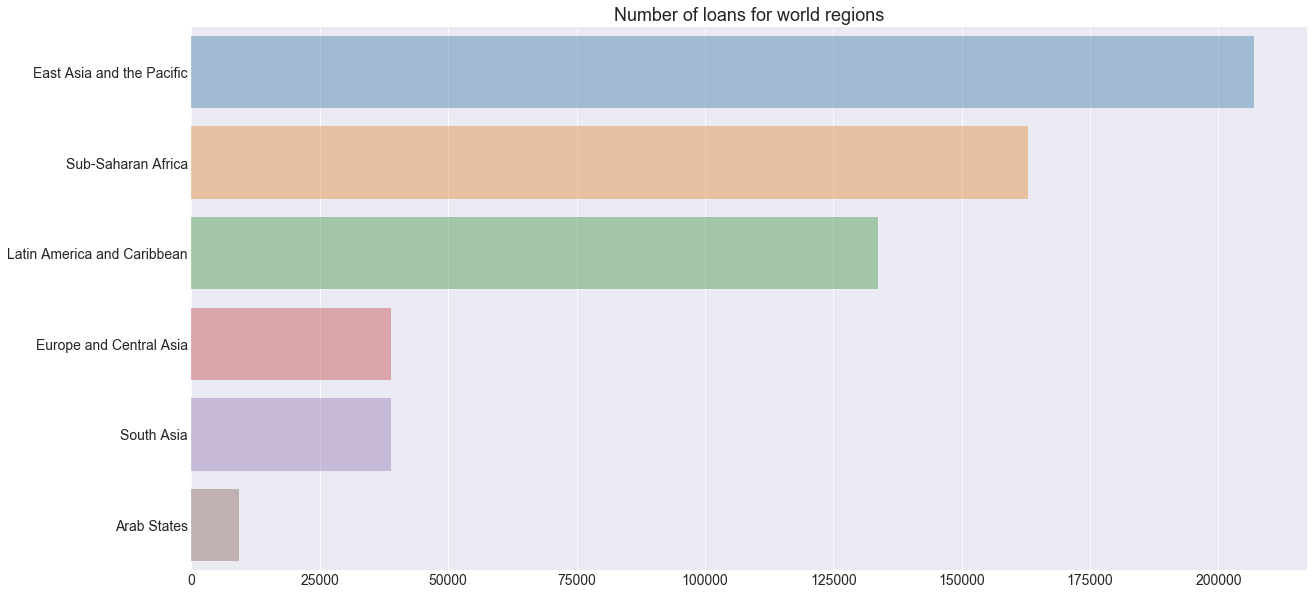

In [45]:
plt.figure(figsize=(20, 10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.4)
plt.title('Number of loans for world regions', fontsize=18)
plt.tick_params(labelsize=14)

In [46]:
df_dependence_on_sectors = df_dependence\
.sort_values('sector')\
.groupby('sector')['borrower_genders']\
.apply(list)\
.to_frame()

df_dependence_on_sectors['males and secs, %'] = 0
df_dependence_on_sectors['females and secs, %'] = 0
df_dependence_on_sectors['groups and secs, %'] = 0
for _ in range(len(df_dependence_on_sectors)):
    pattern = list(df_dependence_on_sectors.iloc[:,0])[_]
    males = pattern.count('male')
    females = pattern.count('female')
    groups = pattern.count('group')
    df_dependence_on_sectors.iloc[_,1] = round(males / (males + females + groups) * 100, 2)
    df_dependence_on_sectors.iloc[_,2] = round(females / (males + females + groups) * 100, 2)
    df_dependence_on_sectors.iloc[_,3] = round(groups / (males + females + groups) * 100, 2)
del df_dependence_on_sectors['borrower_genders']

df_dependence_on_sectors.sort_values(by='females and secs, %', ascending=False)

,"males and secs, %","females and secs, %","groups and secs, %"
sector,,,
Retail,11.16,80.49,8.35
Food,10.10,76.18,13.71
Clothing,8.00,74.57,17.43
Arts,10.91,72.41,16.68
Services,20.45,72.15,7.39
Housing,25.46,67.63,6.91
Health,33.65,58.03,8.32
Education,40.56,56.66,2.78
Agriculture,27.00,56.27,16.73


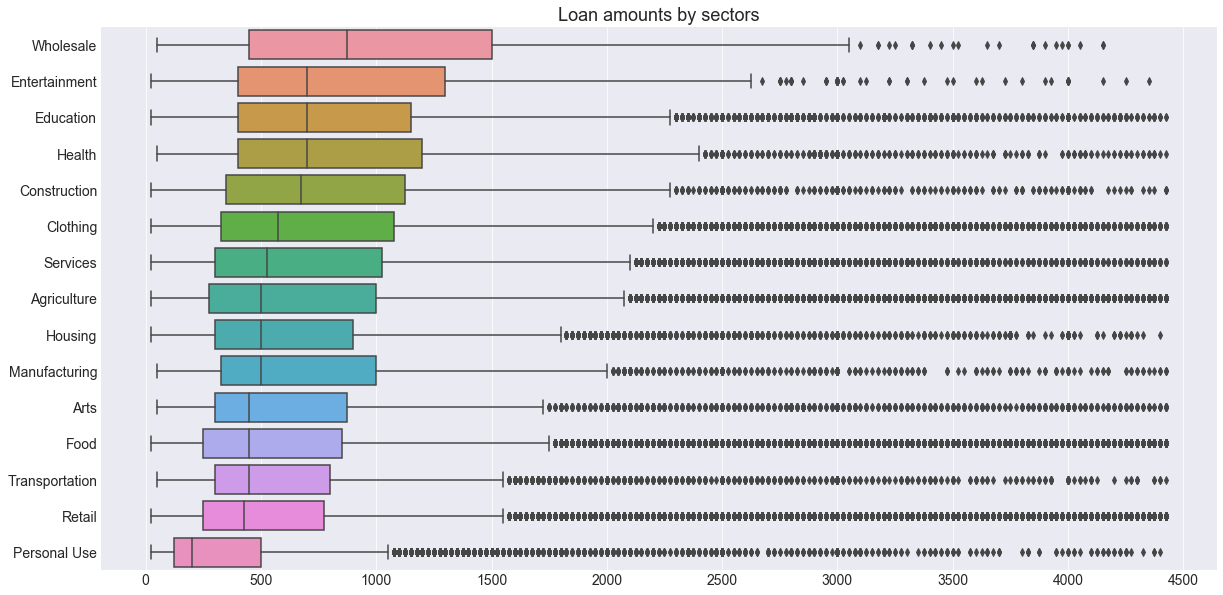

In [47]:
plt.figure(figsize=(20,10))
plt.title("Loan amounts by sectors", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", order=sort_order, data=df_kiva_loans_trimmed)\
.set(ylabel=None, xlabel=None)
plt.show()

Исследование показало, что между полами заемщиков и регионами, а также между полами заемщиков и секторами экономики нет никакой связи. Нельзя сказать, что на каких-то континентах преобладает конкретная категория заемщиков. То же самое касается и секторов.


### №2

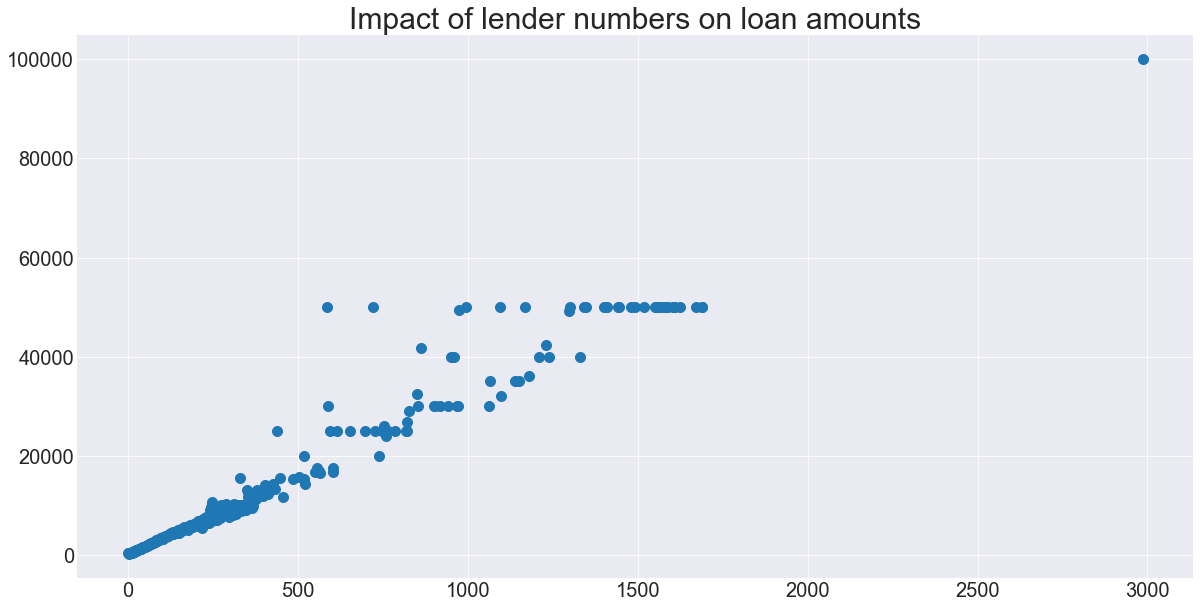

In [48]:
lenders_and_amounts = df_kiva_loans\
.dropna()\
.sort_values(by='lender_count')\
.groupby('lender_count')\
.agg({'loan_amount':'mean'})
lenders_and_amounts

plt.figure(figsize=(20, 10))
plt.plot(lenders_and_amounts.index, lenders_and_amounts['loan_amount'], '.', markersize=20)
plt.title('Impact of lender numbers on loan amounts', fontsize=30)
plt.tick_params(labelsize=20)

plt.show()

На графике видно, что с увеличением количества кредиторов растет и сумма займа.

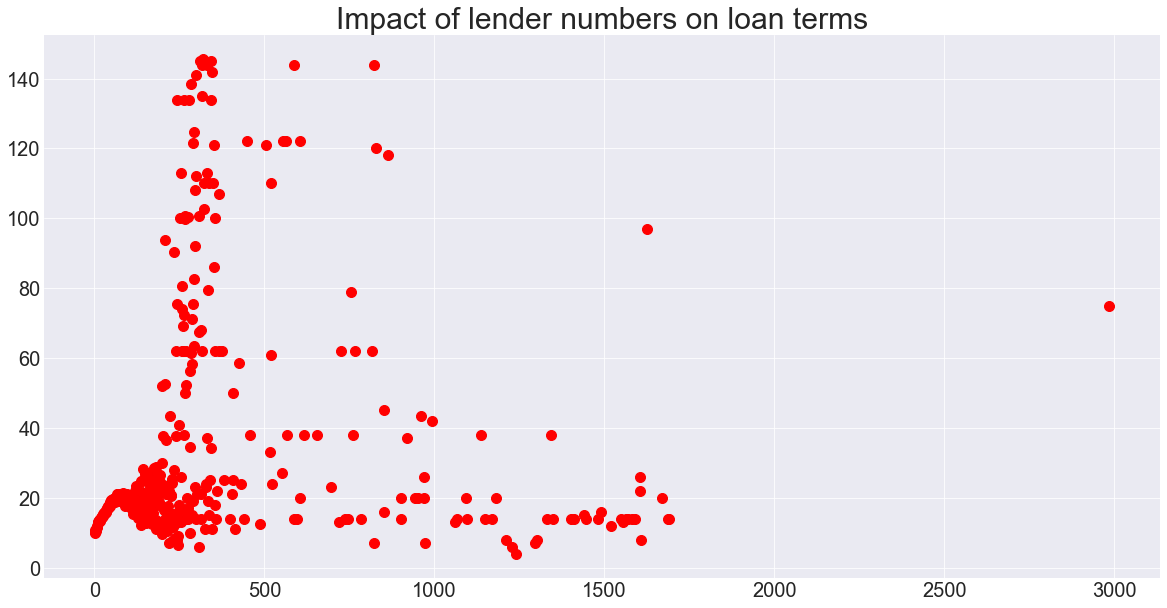

In [49]:
lenders_and_terms = df_kiva_loans\
.dropna()\
.sort_values(by='lender_count')\
.groupby('lender_count')\
.agg({'term_in_months':'mean'})
lenders_and_terms

plt.figure(figsize=(20, 10))
plt.plot(lenders_and_terms.index, lenders_and_terms['term_in_months'], '.', markersize=20, color='red')
plt.title('Impact of lender numbers on loan terms', fontsize=30)
plt.tick_params(labelsize=20)

plt.show()

График показывает, что какой-либо тенденции в отношении числа кредиторов и срока займов нет. Можно сказать, что больше всего времени дают на выплату займов, в которых число кредиторов менее 400. Там, где больше кредиторов, наблюдается довольно сильный разброс.<br><br>
Возможно, это объясняется тем, что чем больше людей готовы дать кому-то кредит, тем сложнее им прийти к какому-либо консенусу относительно времени выплаты, так как у каждого своя ситуация и финансовое положение. Поэтому сроки займов высоки преимущественно в тех случаях, когда число кредиторов не столь велико.

### №3

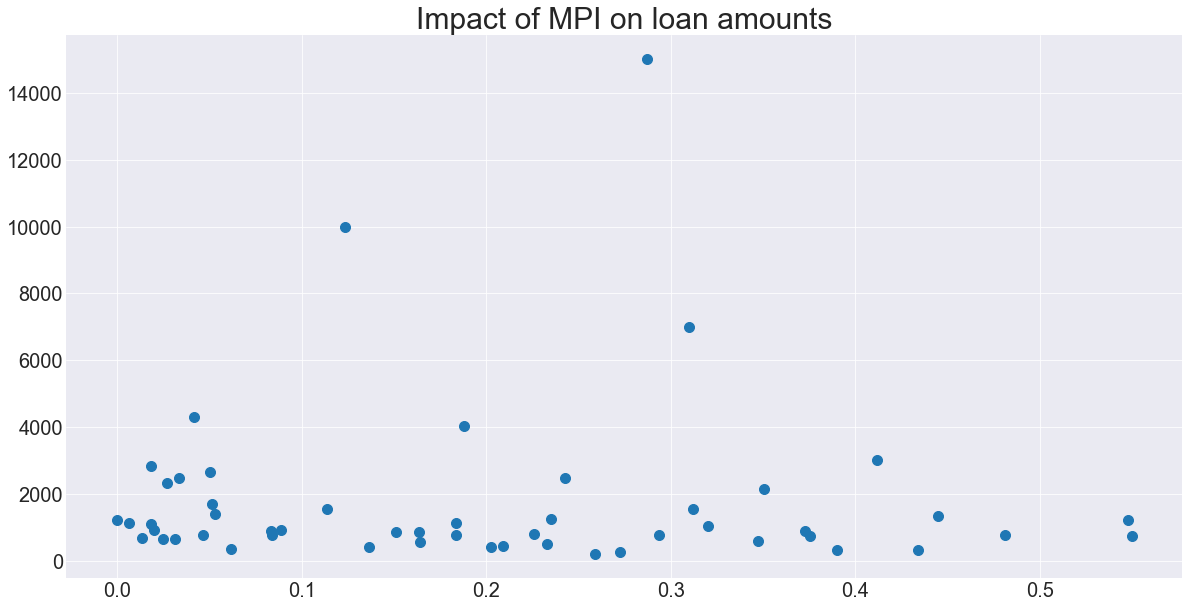

In [50]:
df_mpi_dependence = df_kiva_loans[['MPI', 'loan_amount', 'term_in_months']]\
.dropna(subset=['MPI', 'loan_amount', 'term_in_months'])\
.sort_values(by='MPI')\
.groupby('MPI')\
.agg({'loan_amount':'mean'})

plt.figure(figsize=(20, 10))
plt.plot(df_mpi_dependence.index, df_mpi_dependence['loan_amount'], '.', markersize=20)
plt.title('Impact of MPI on loan amounts', fontsize=30)
plt.tick_params(labelsize=20)

plt.show()

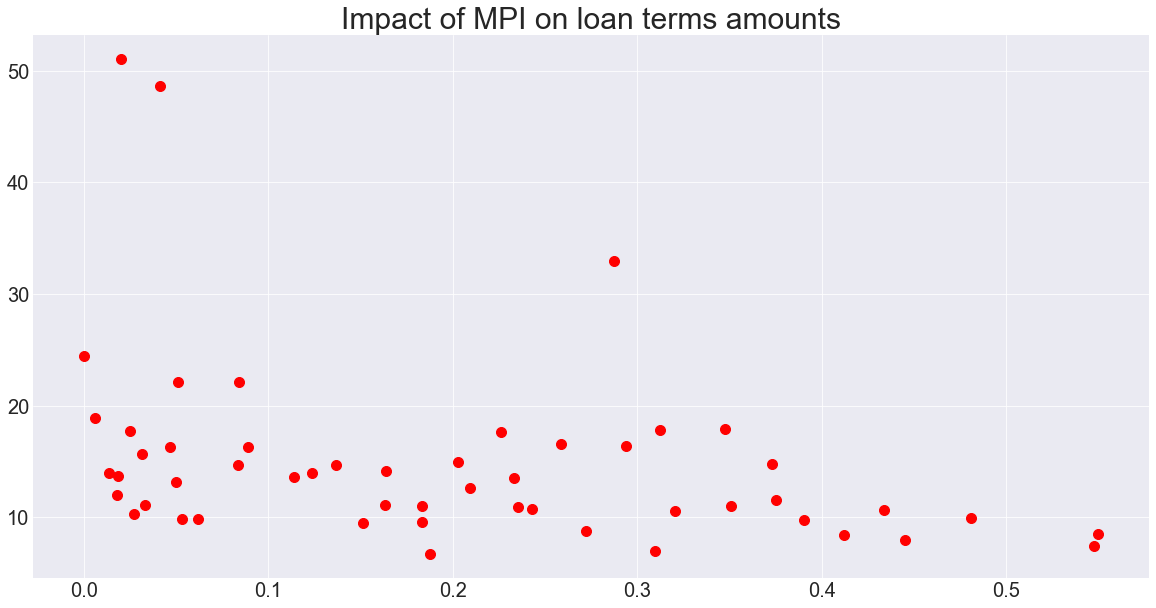

In [51]:
df_mpi_dependence = df_kiva_loans[['MPI', 'loan_amount', 'term_in_months']]\
.dropna(subset=['MPI', 'loan_amount', 'term_in_months'])\
.sort_values(by='MPI')\
.groupby('MPI')\
.agg({'term_in_months':'mean'})

plt.figure(figsize=(20, 10))
plt.plot(df_mpi_dependence.index, df_mpi_dependence['term_in_months'], '.', markersize=20, color='red')
plt.title('Impact of MPI on loan terms amounts', fontsize=30)
plt.tick_params(labelsize=20)

plt.show()

Исходя из графика, можем предположить, что индекс бедности не влияет ни на сумму займа, ни на срок его погашения.

### №4

Исходя из последних пунктов домашнего задания, можно утверждать, что чем больше оформленный кредит,
тем больше сумма ежемесячного платежа. Однако эти показатели абосолютно не зависят от периода выплаты кредита.

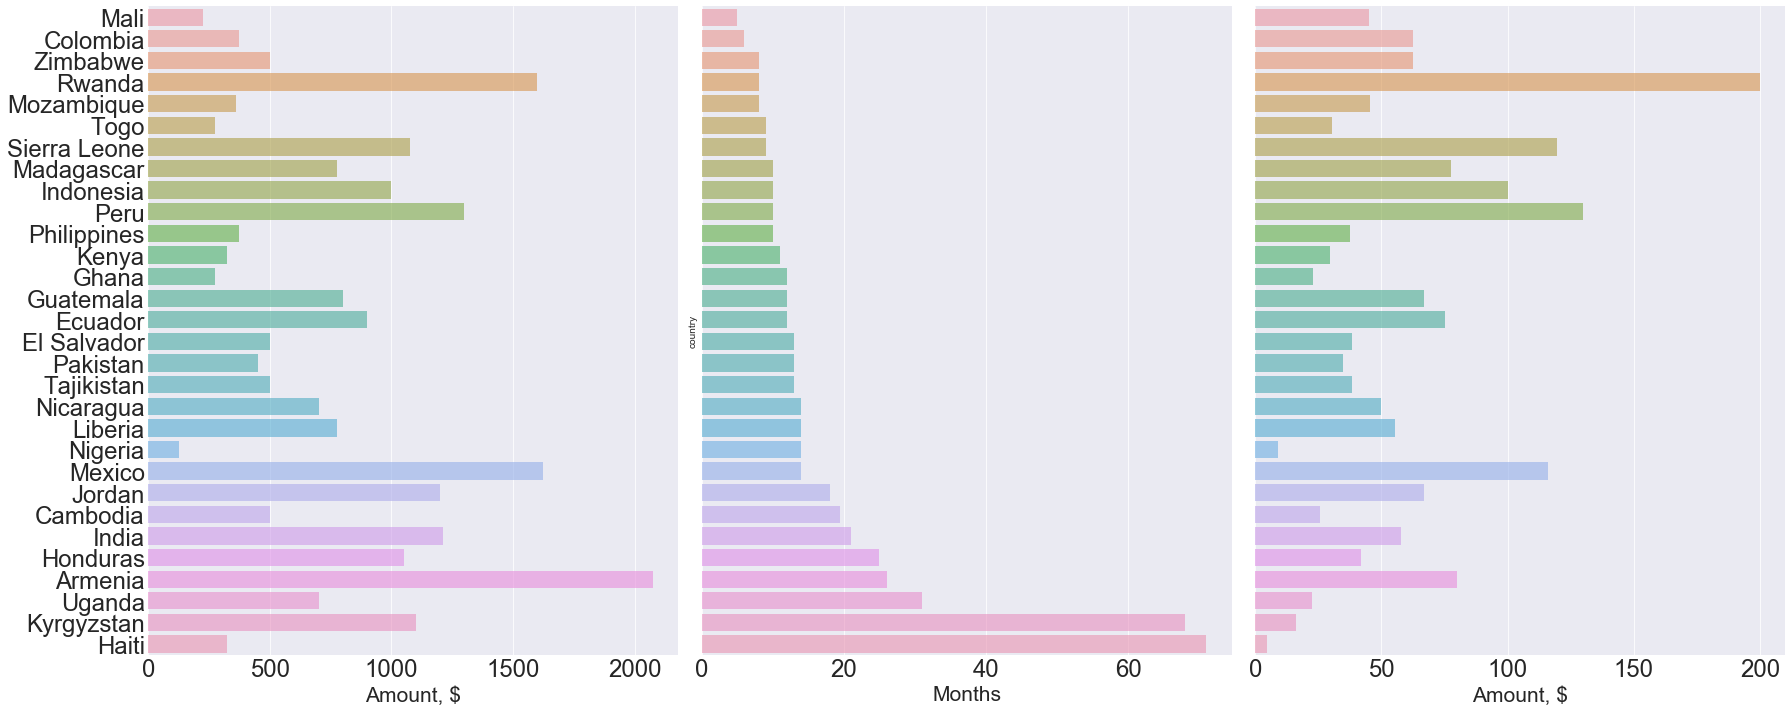

In [89]:
df = list(df_kiva_loans.groupby('world_region'))[0][1]

f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[0])
# ax[0].set_title("Median loan payment period", fontsize=30)
ax[0].set_xlabel('Amount, $', fontsize=21)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=24)

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[1])
# # ax[1].set_title("Median loan amount", fontsize=30)
ax[1].set_xlabel('Months', fontsize=21)
# ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=24)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
# # ax[2].set_title("Median monthly payment", fontsize=30)
ax[2].set_xlabel('Amount, $', fontsize=21)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=24)
plt.tight_layout()
plt.show()